### Wstęp do Uczenia Maszynowego 


##### Laboratorium 4

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

## 1. Model regresji liniowej

In [15]:
hills = pd.read_csv("hills.csv")

### Zadanie 1 
------
Dla danych `hills.csv`:

a) Narysuj wykres rozproszenia zmiennej *time* od *dist* oraz *time* od *climb*.

b) Oblicz współczynnik korelacji.


<Axes: xlabel='climb', ylabel='time'>

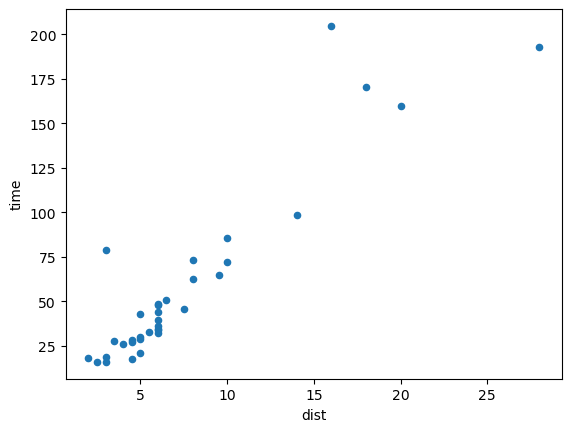

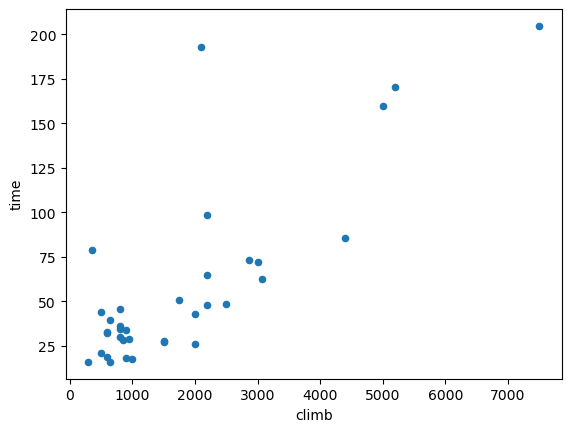

In [16]:
hills.plot.scatter(x = 'dist', y = 'time')
hills.plot.scatter(x = 'climb', y = 'time')

In [17]:
hills[['dist', 'time', 'climb']].corr()

,dist,time,climb
dist,1.000000,0.919589,0.652346
time,0.919589,1.000000,0.805239
climb,0.652346,0.805239,1.000000


### 1.1 Budujemy model regresji liniowej dla pary zmiennych dist i time

In [18]:
# Podział zmiennych na y i X
y = hills.time
X = hills.drop(["time", "Unnamed: 0", 'climb'], axis = 1)

# Model regresji liniowej
lm = LinearRegression()
lm = lm.fit(X, y)


In [19]:
# Współczynniki
lm.coef_

array([8.33045619])

In [20]:
# Wyraz wolny
lm.intercept_

-4.840720185065344

### Zadanie 2
----
Na wykresie rozproszenia zaznacz wyestymowaną prostą z modelu liniowego.

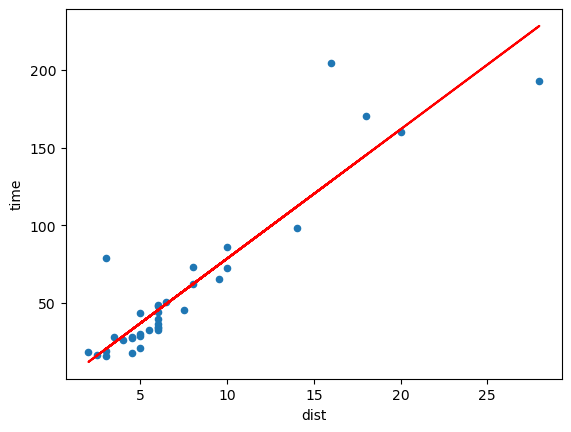

In [21]:
hills.plot.scatter(x = 'dist', y = 'time')
plt.plot(hills.dist, hills.dist*lm.coef_ + lm.intercept_, 'red')

### Zadanie 3
Zbuduj model regresji liniowej wyliczający zależność *time* od *climb*, wyznacz współczynniki, narysuj wykres rozproszenie i zaznacz wyestymowaną prostą.

In [22]:
y = hills.time
X = hills.drop(["time", "Unnamed: 0", 'dist'], axis = 1)

lm = LinearRegression()
lm = lm.fit(X, y)


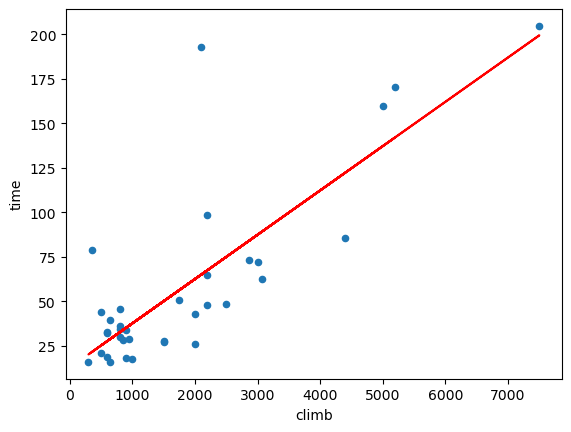

In [23]:
hills.plot.scatter(x = 'climb', y = 'time')
plt.plot(hills.climb, hills.climb*lm.coef_ + lm.intercept_, 'red')

## 2. Model regresji logistycznej

In [24]:
df = pd.read_csv("SAheart.data")

### Zadanie 4
----
Przygotuj zbiór danych `SAheart.data` do dalszej pracy.


In [25]:
SAheart = pd.read_csv("SAheart.data")

In [26]:
# Zmienna kategoryczna (o dwóch poziomach) jest zmieniana na dwie zmienne binarne (OneHotEnconding)
SAheart = pd.get_dummies(SAheart)
SAheart = SAheart.drop(['row.names'], axis = 1)

# Podział zbioru na X i y
y = SAheart.chd
X = SAheart.drop(['chd'], axis = 1)

# Podział zbioru na train i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


### Zadanie 5
a) Dopasuj model regresji logistycznej do danych `SAheart.data`.

b) Oblicz prawdopodobieństw przynależności do klasy 1 dla zbioru testowego:

  - metodą `decision_function` oraz odwrotnością funkcji logitowej
    
  - metodą `predict_proba`

c) Dokonaj predykcji dla obserwacji o wartości `sbp = 127`, `age = 30`, `alcohol = 0`, `obesity = 25`, `typea = 49`, `famhist = 'Present'`, `tobbaco = 0`, `ldl = 4.44`, `adiposity = 18`.

In [27]:
# Dopasowanie modelu regresji logistycznej
glm = LogisticRegression(penalty=None, max_iter=300)
glm.fit(X_train, y_train)

LogisticRegression(max_iter=300, penalty=None)

In [28]:
# Współczynniki
glm.coef_

array([[ 3.17456762e-03,  8.51836331e-02,  1.93932995e-01,
         2.52167655e-02,  4.89617694e-02, -7.52962575e-02,
        -1.82067180e-03,  5.09546385e-02, -2.46712741e+00,
        -1.45420333e+00]])

In [ ]:
# Predykcja (prawdopodobieństwa)
glm.predict_proba(X_test)[:,1]

array([0.11535142, 0.22646698, 0.08720917, 0.17527699, 0.76110061,
       0.45145784, 0.20526812, 0.23870801, 0.02657993, 0.28700548,
       0.19220469, 0.23198551, 0.81554238, 0.22012933, 0.14897037,
       0.42490005, 0.03609777, 0.38918641, 0.08335958, 0.35940297,
       0.06633868, 0.21069835, 0.23304337, 0.14710991, 0.18048591,
       0.55757144, 0.17308186, 0.10790611, 0.45489529, 0.92495301,
       0.27428099, 0.49283308, 0.27284408, 0.63247826, 0.43283919,
       0.76704676, 0.19785535, 0.20886103, 0.1379315 , 0.18441283,
       0.79679819, 0.82254255, 0.61389142, 0.06311521, 0.82223447,
       0.14315194, 0.07575618, 0.0393034 , 0.23403239, 0.16703114,
       0.50649518, 0.53577252, 0.07739729, 0.37134227, 0.71857362,
       0.62300027, 0.060698  , 0.84183903, 0.26915012, 0.29156389,
       0.80377057, 0.50283859, 0.73375   , 0.35577573, 0.20072712,
       0.64864912, 0.04740057, 0.89945752, 0.07319874, 0.34311057,
       0.47833385, 0.66612195, 0.20294174, 0.78138674, 0.82794

### Zadanie 6
-----
Weźmy pod uwagę dane `earthquake.csv`, które dotyczą klasyfikacji wstrząsów (zmienna *popn*). Zmienne objaśniające to zmienne *body* i *surface* (zmienne sejsmologiczne).

a) Wykonaj wykres dla zmiennych *body* i *surface* z zaznaczeniem przynależności do klas.

b) Dopasuj modej regresji logistycznej. 

c) Interpretacja współczynników.